In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
titanic = pd.read_csv('train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
print('Survived : ', titanic.Survived.unique())
print('Pclasses : ', titanic.Pclass.unique())
print('Gender   : ', titanic.Sex.unique())
print('Embarked : ', titanic.Embarked.dropna().unique())

Survived :  [0 1]
Pclasses :  [3 1 2]
Gender   :  ['male' 'female']
Embarked :  ['S' 'C' 'Q']


---
---

In [12]:
titanic.duplicated().sum()

0

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic.drop('Cabin', axis = 1, inplace = True)
titanic.Age.replace(np.nan, titanic.Age.mean(), inplace = True)
titanic.Embarked.replace(np.nan, titanic.Embarked.mode()[0], inplace = True)

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Creating a new column family_members
titanic['family_members'] = titanic.SibSp + titanic.Parch
titanic.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1


---
---

<AxesSubplot:xlabel='Survived', ylabel='count'>

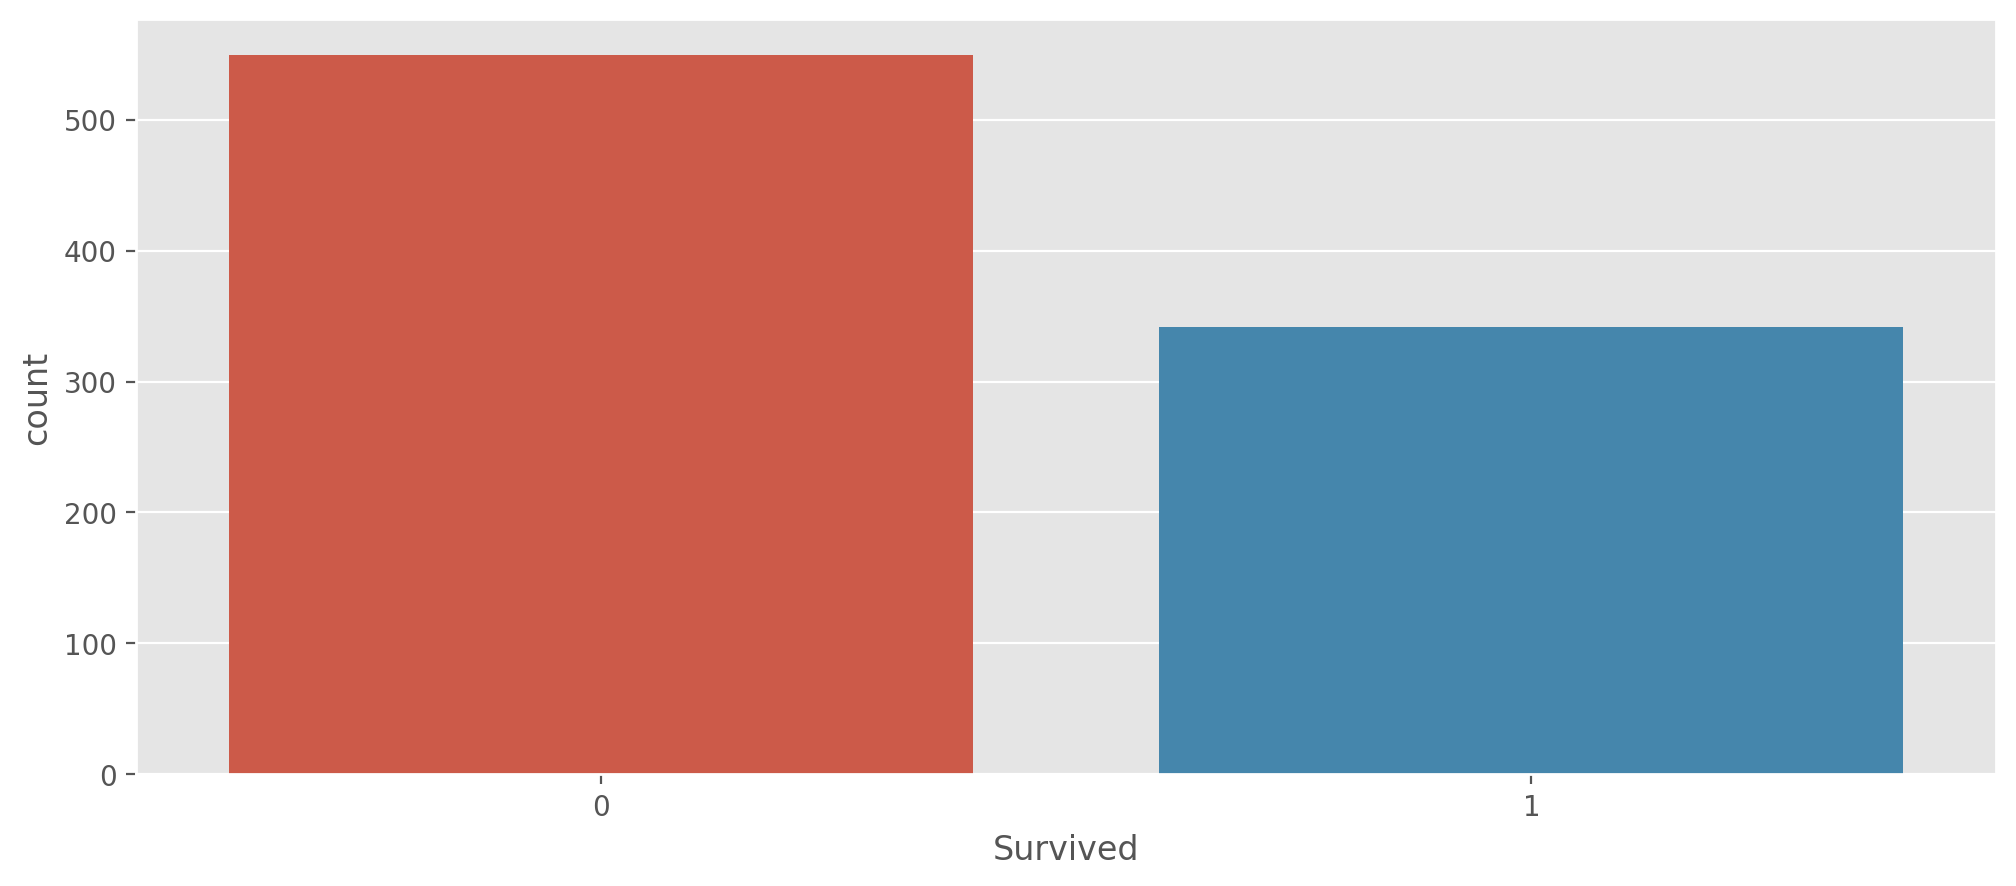

In [16]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Survived', data = titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

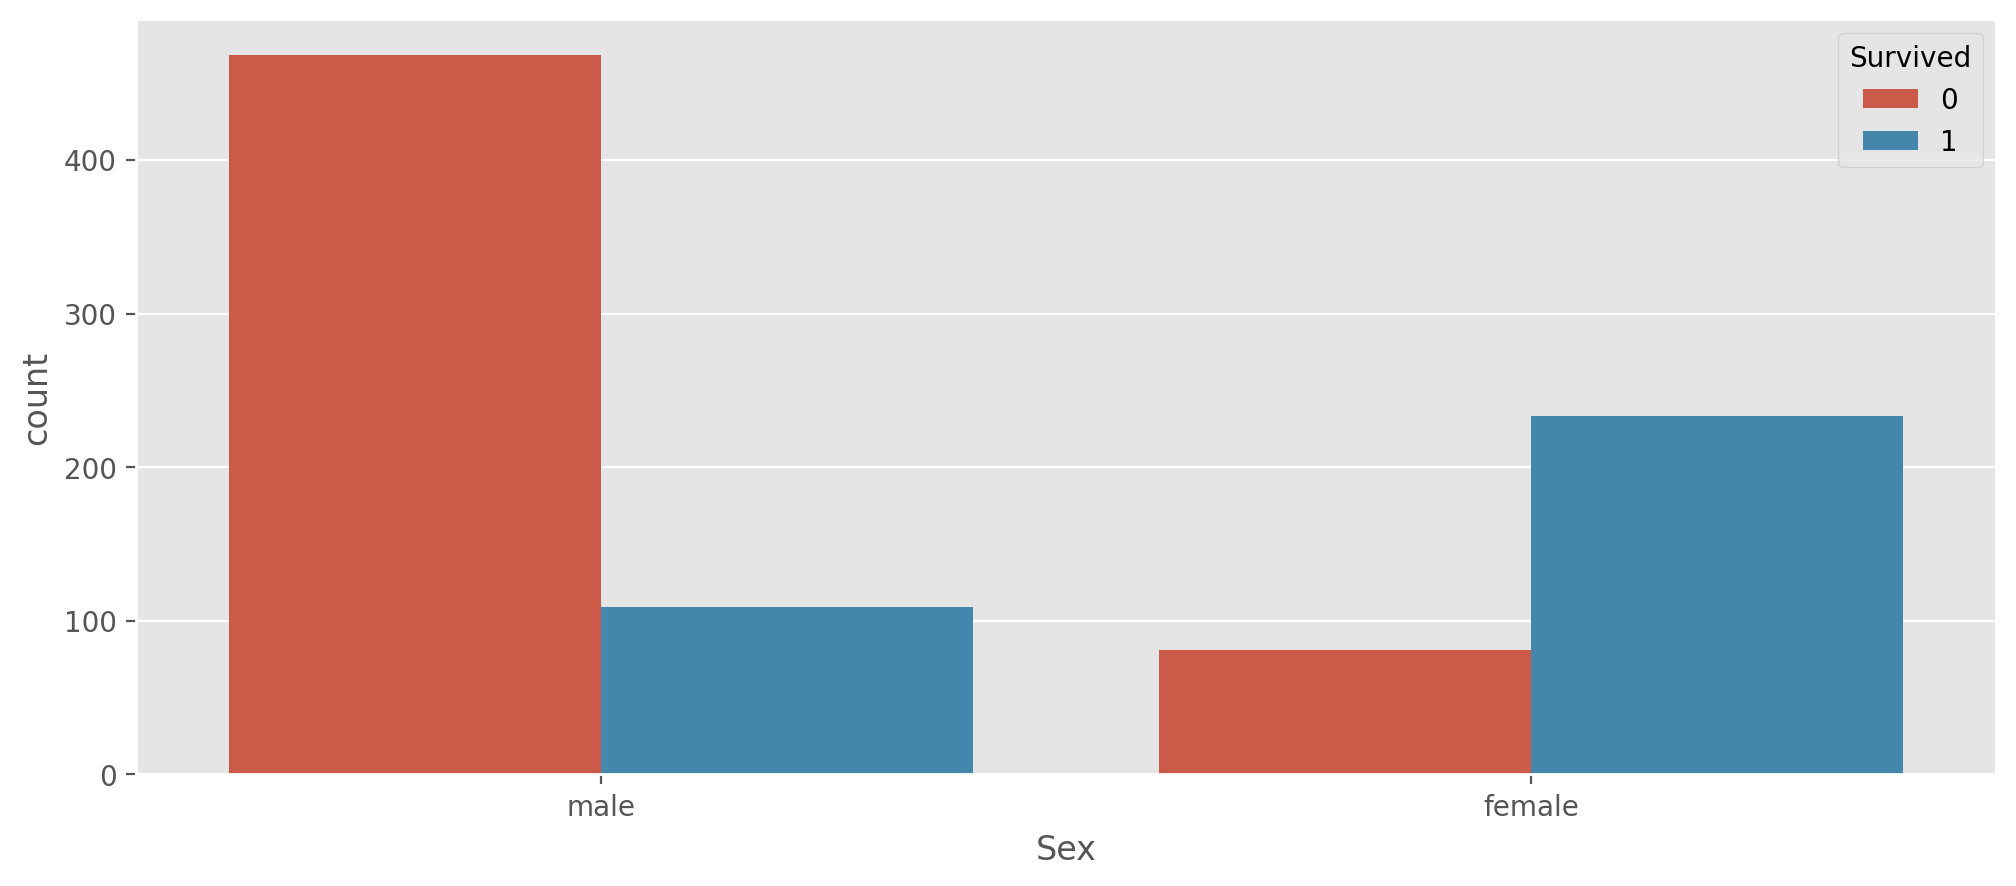

In [17]:
# Sex and Survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Sex', hue = 'Survived', data = titanic)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

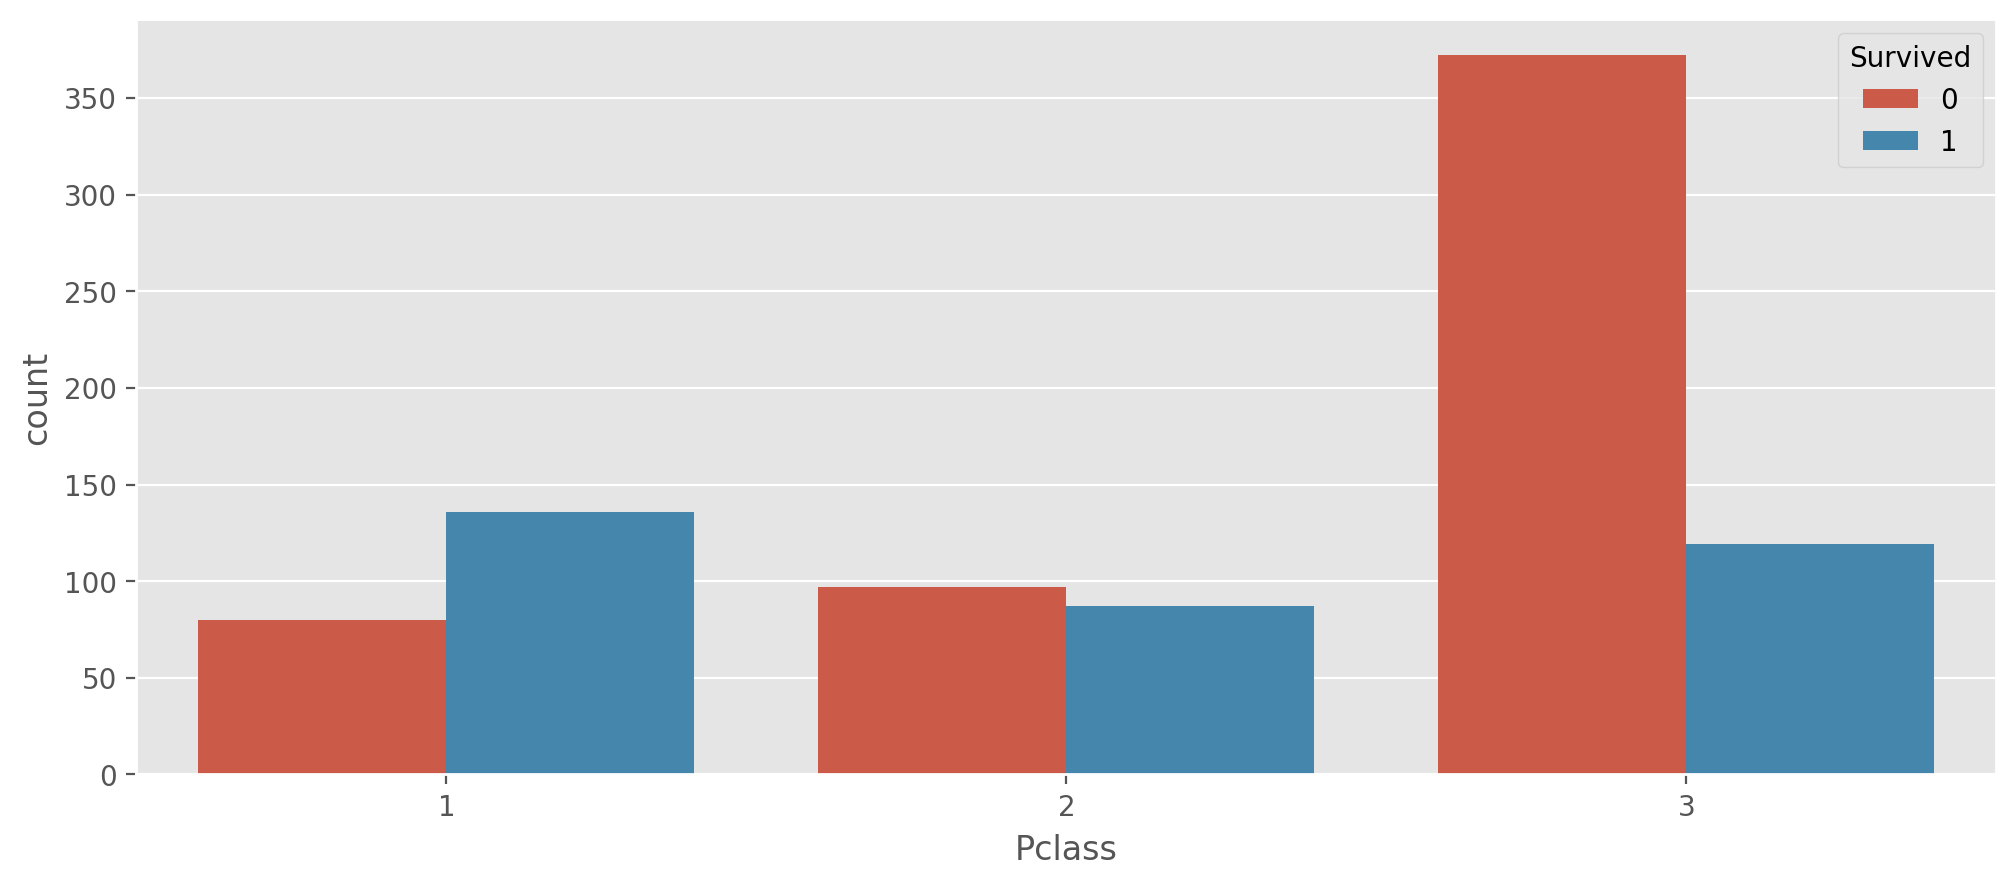

In [18]:
# Pclass and Survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Pclass', hue = 'Survived', data = titanic)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

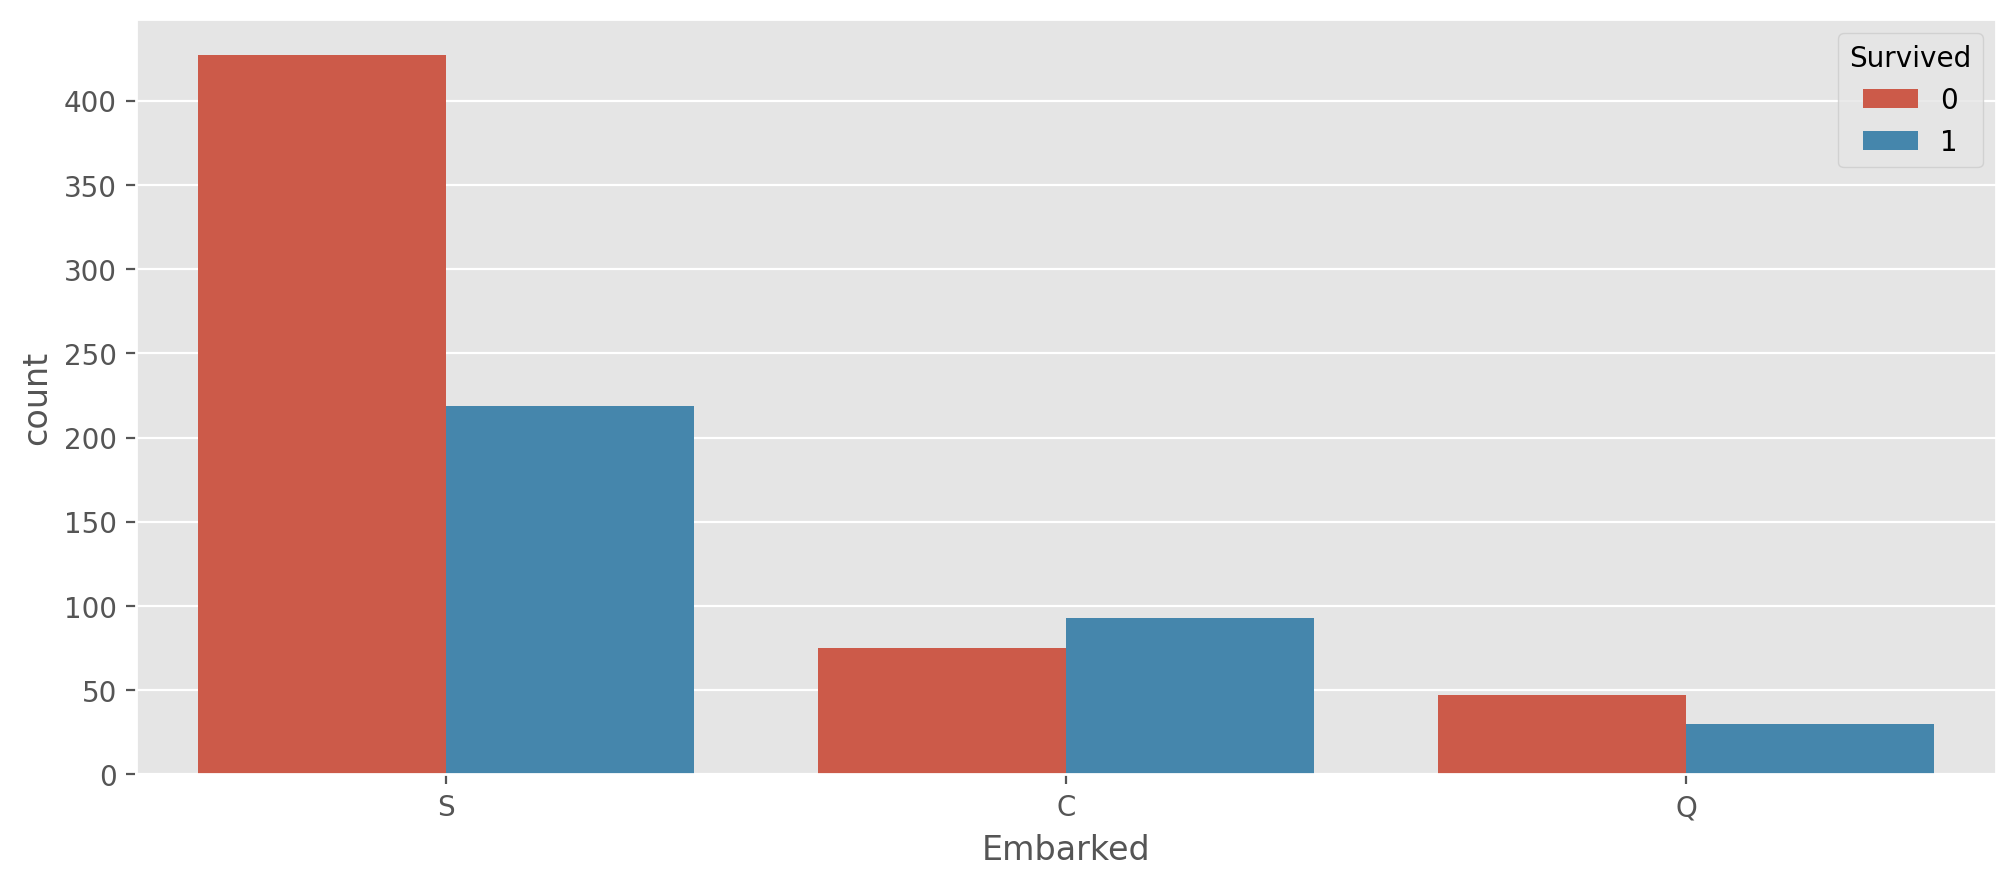

In [20]:
# Embarked and Survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Embarked', hue = 'Survived', data = titanic)

<AxesSubplot:xlabel='family_members', ylabel='count'>

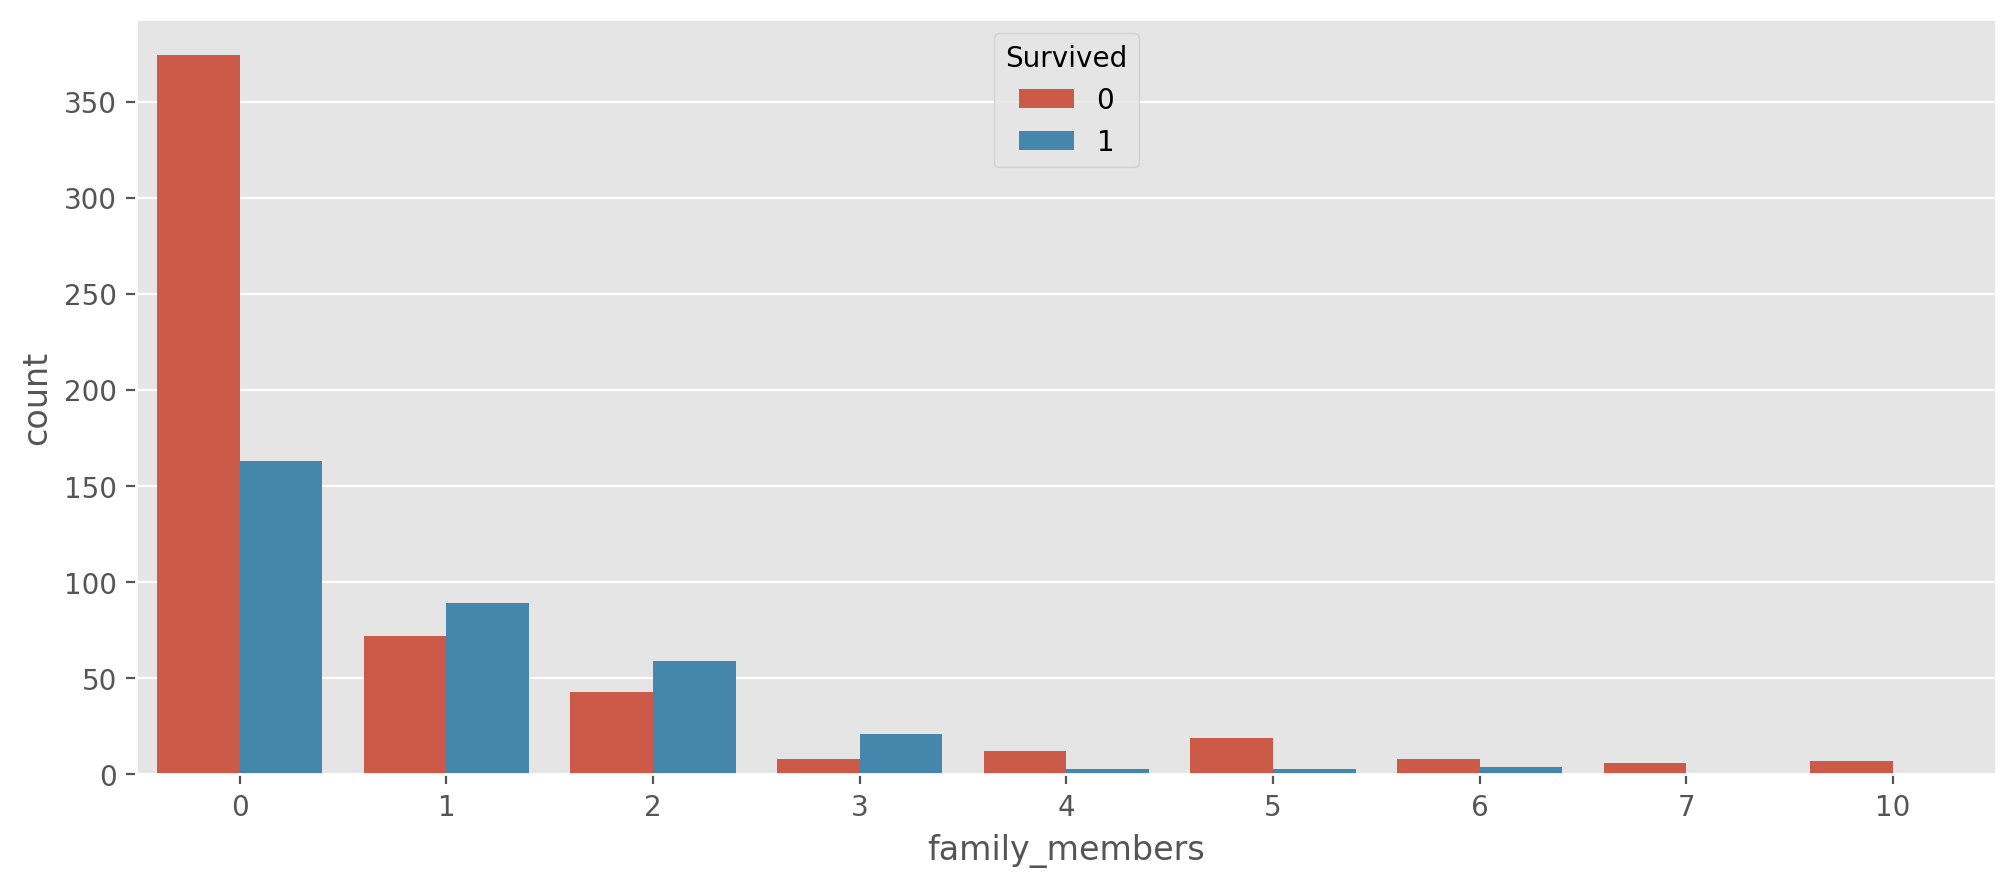

In [21]:
# Family members and survived
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('family_members', hue = 'Survived', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

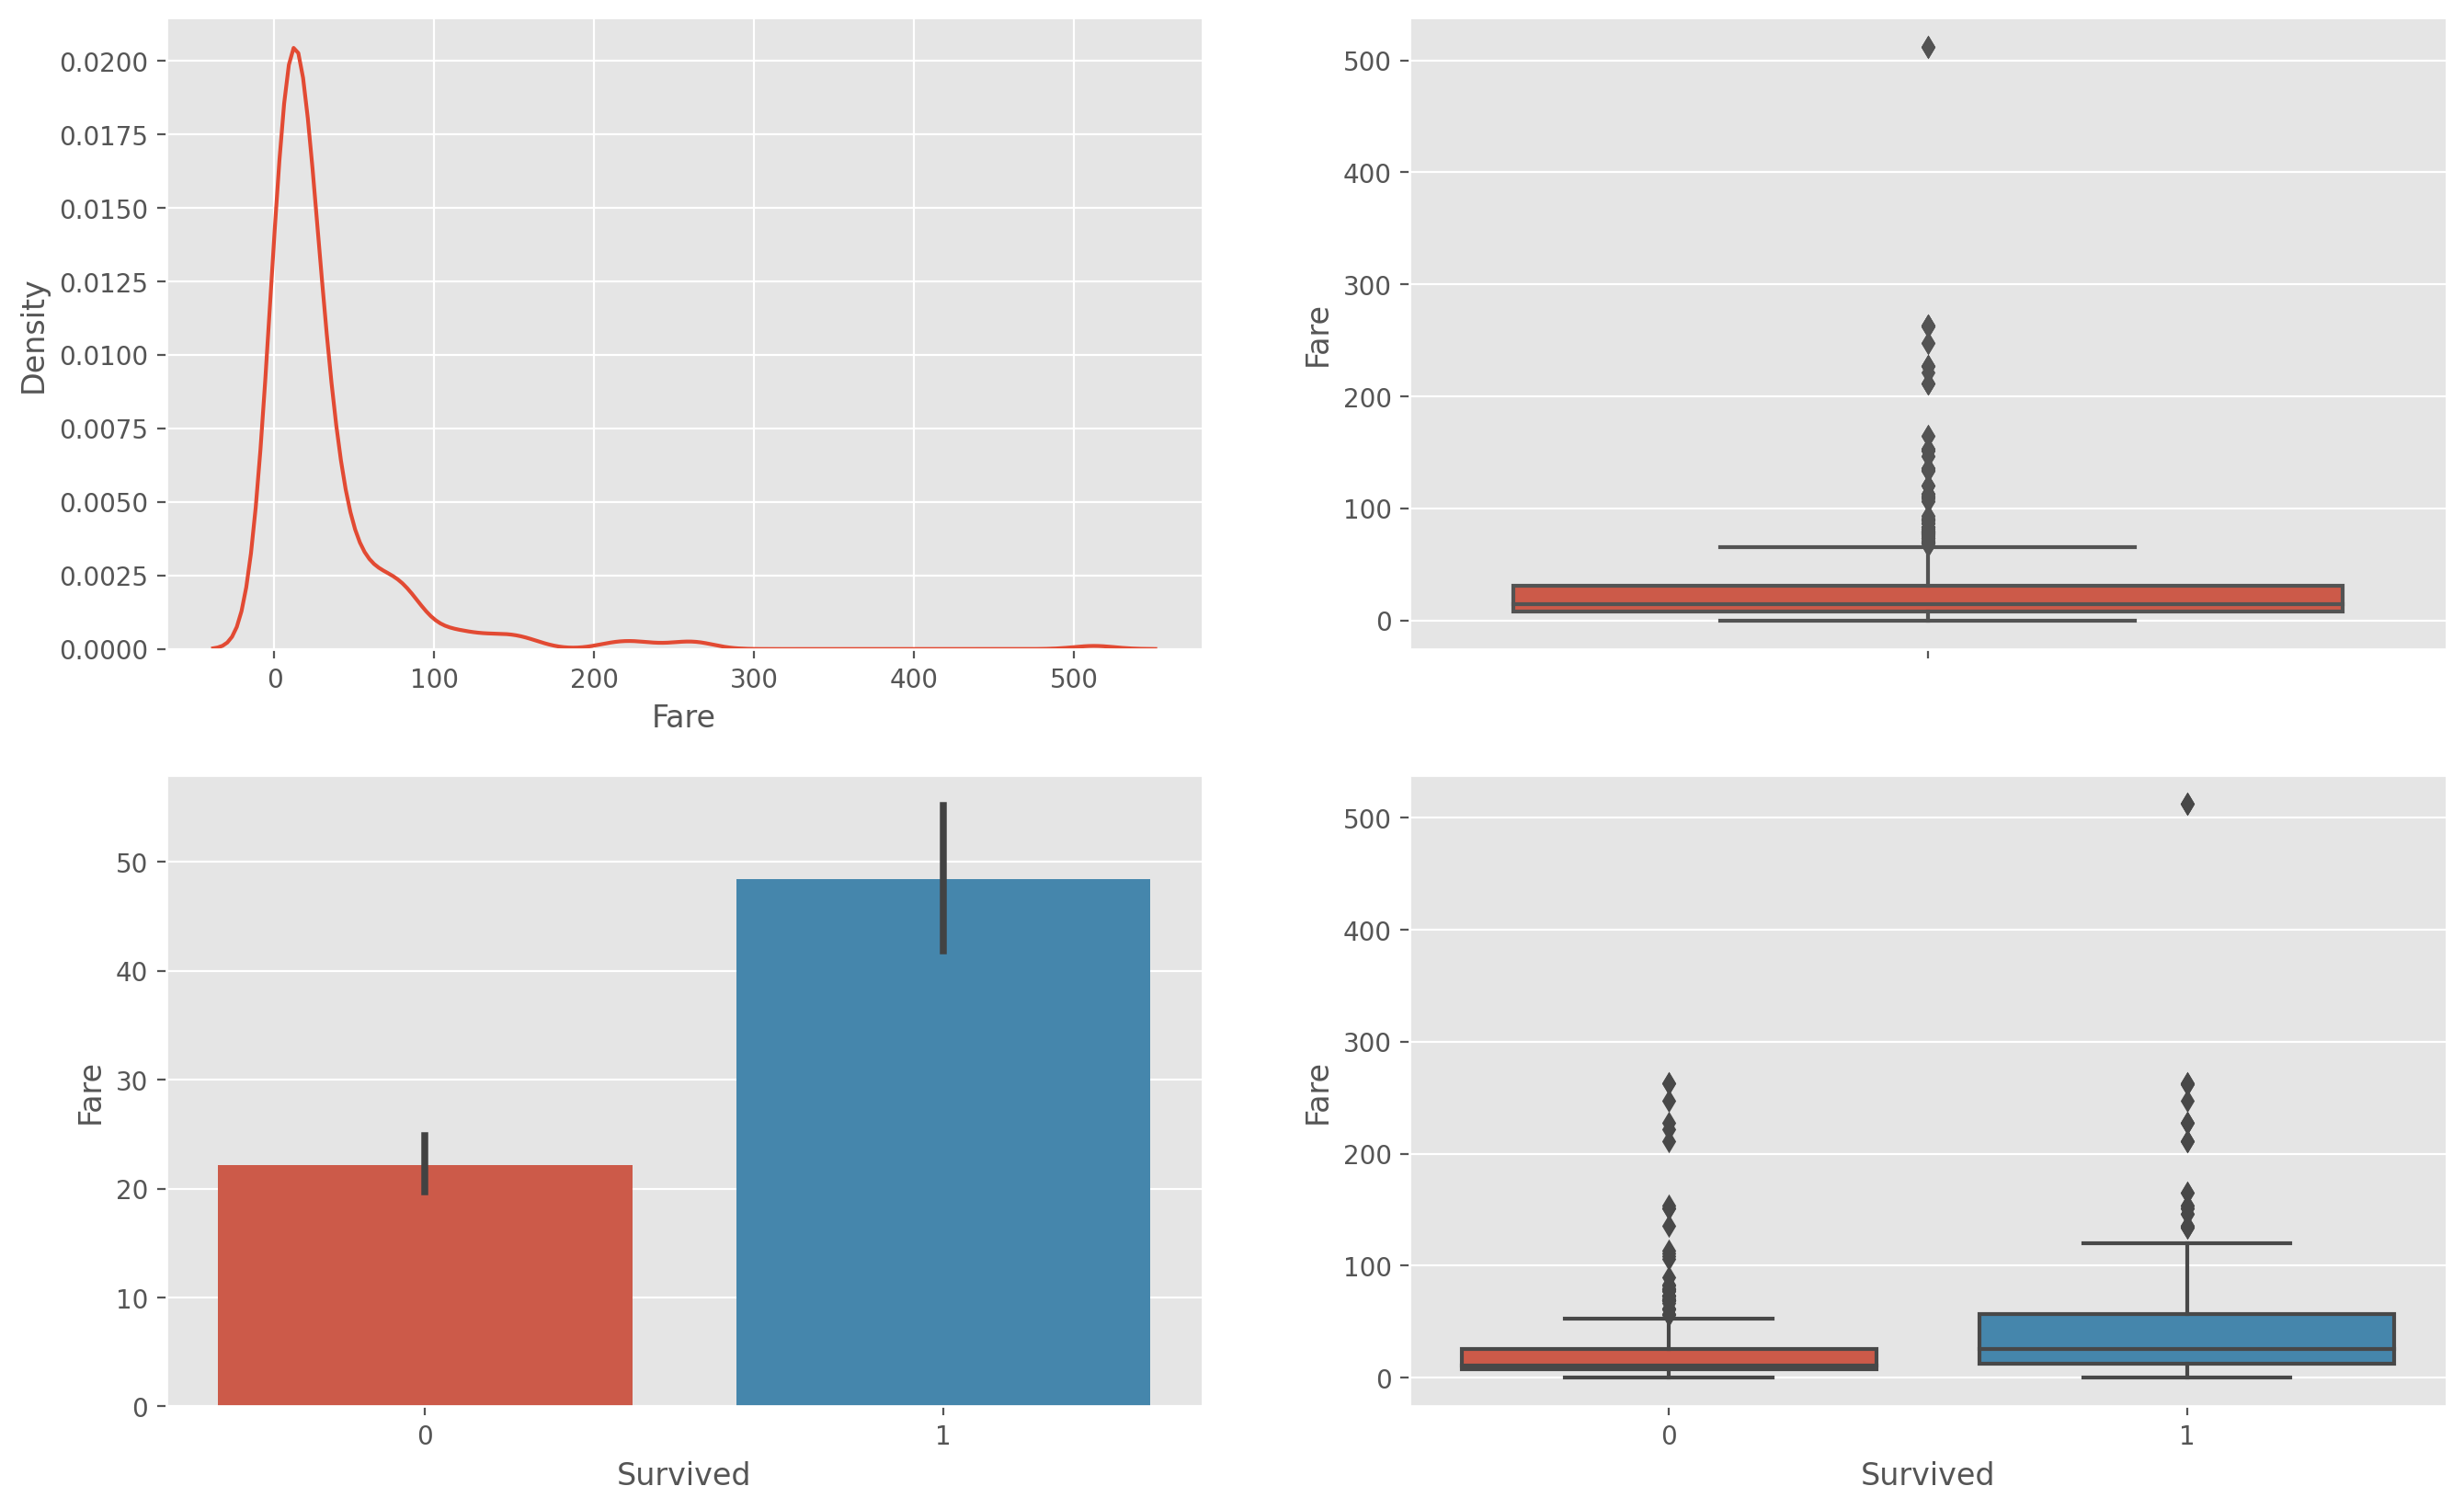

In [23]:
# Fare
plt.figure(figsize = (16,10), dpi = 200)
plt.subplot(2,2,1)
sns.distplot(titanic['Fare'], hist = False)
plt.subplot(2,2,2)
sns.boxplot(y = titanic['Fare'])
plt.subplot(2,2,3)
sns.barplot('Survived', 'Fare', data = titanic)
plt.subplot(2,2,4)
sns.boxplot('Survived', 'Fare', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

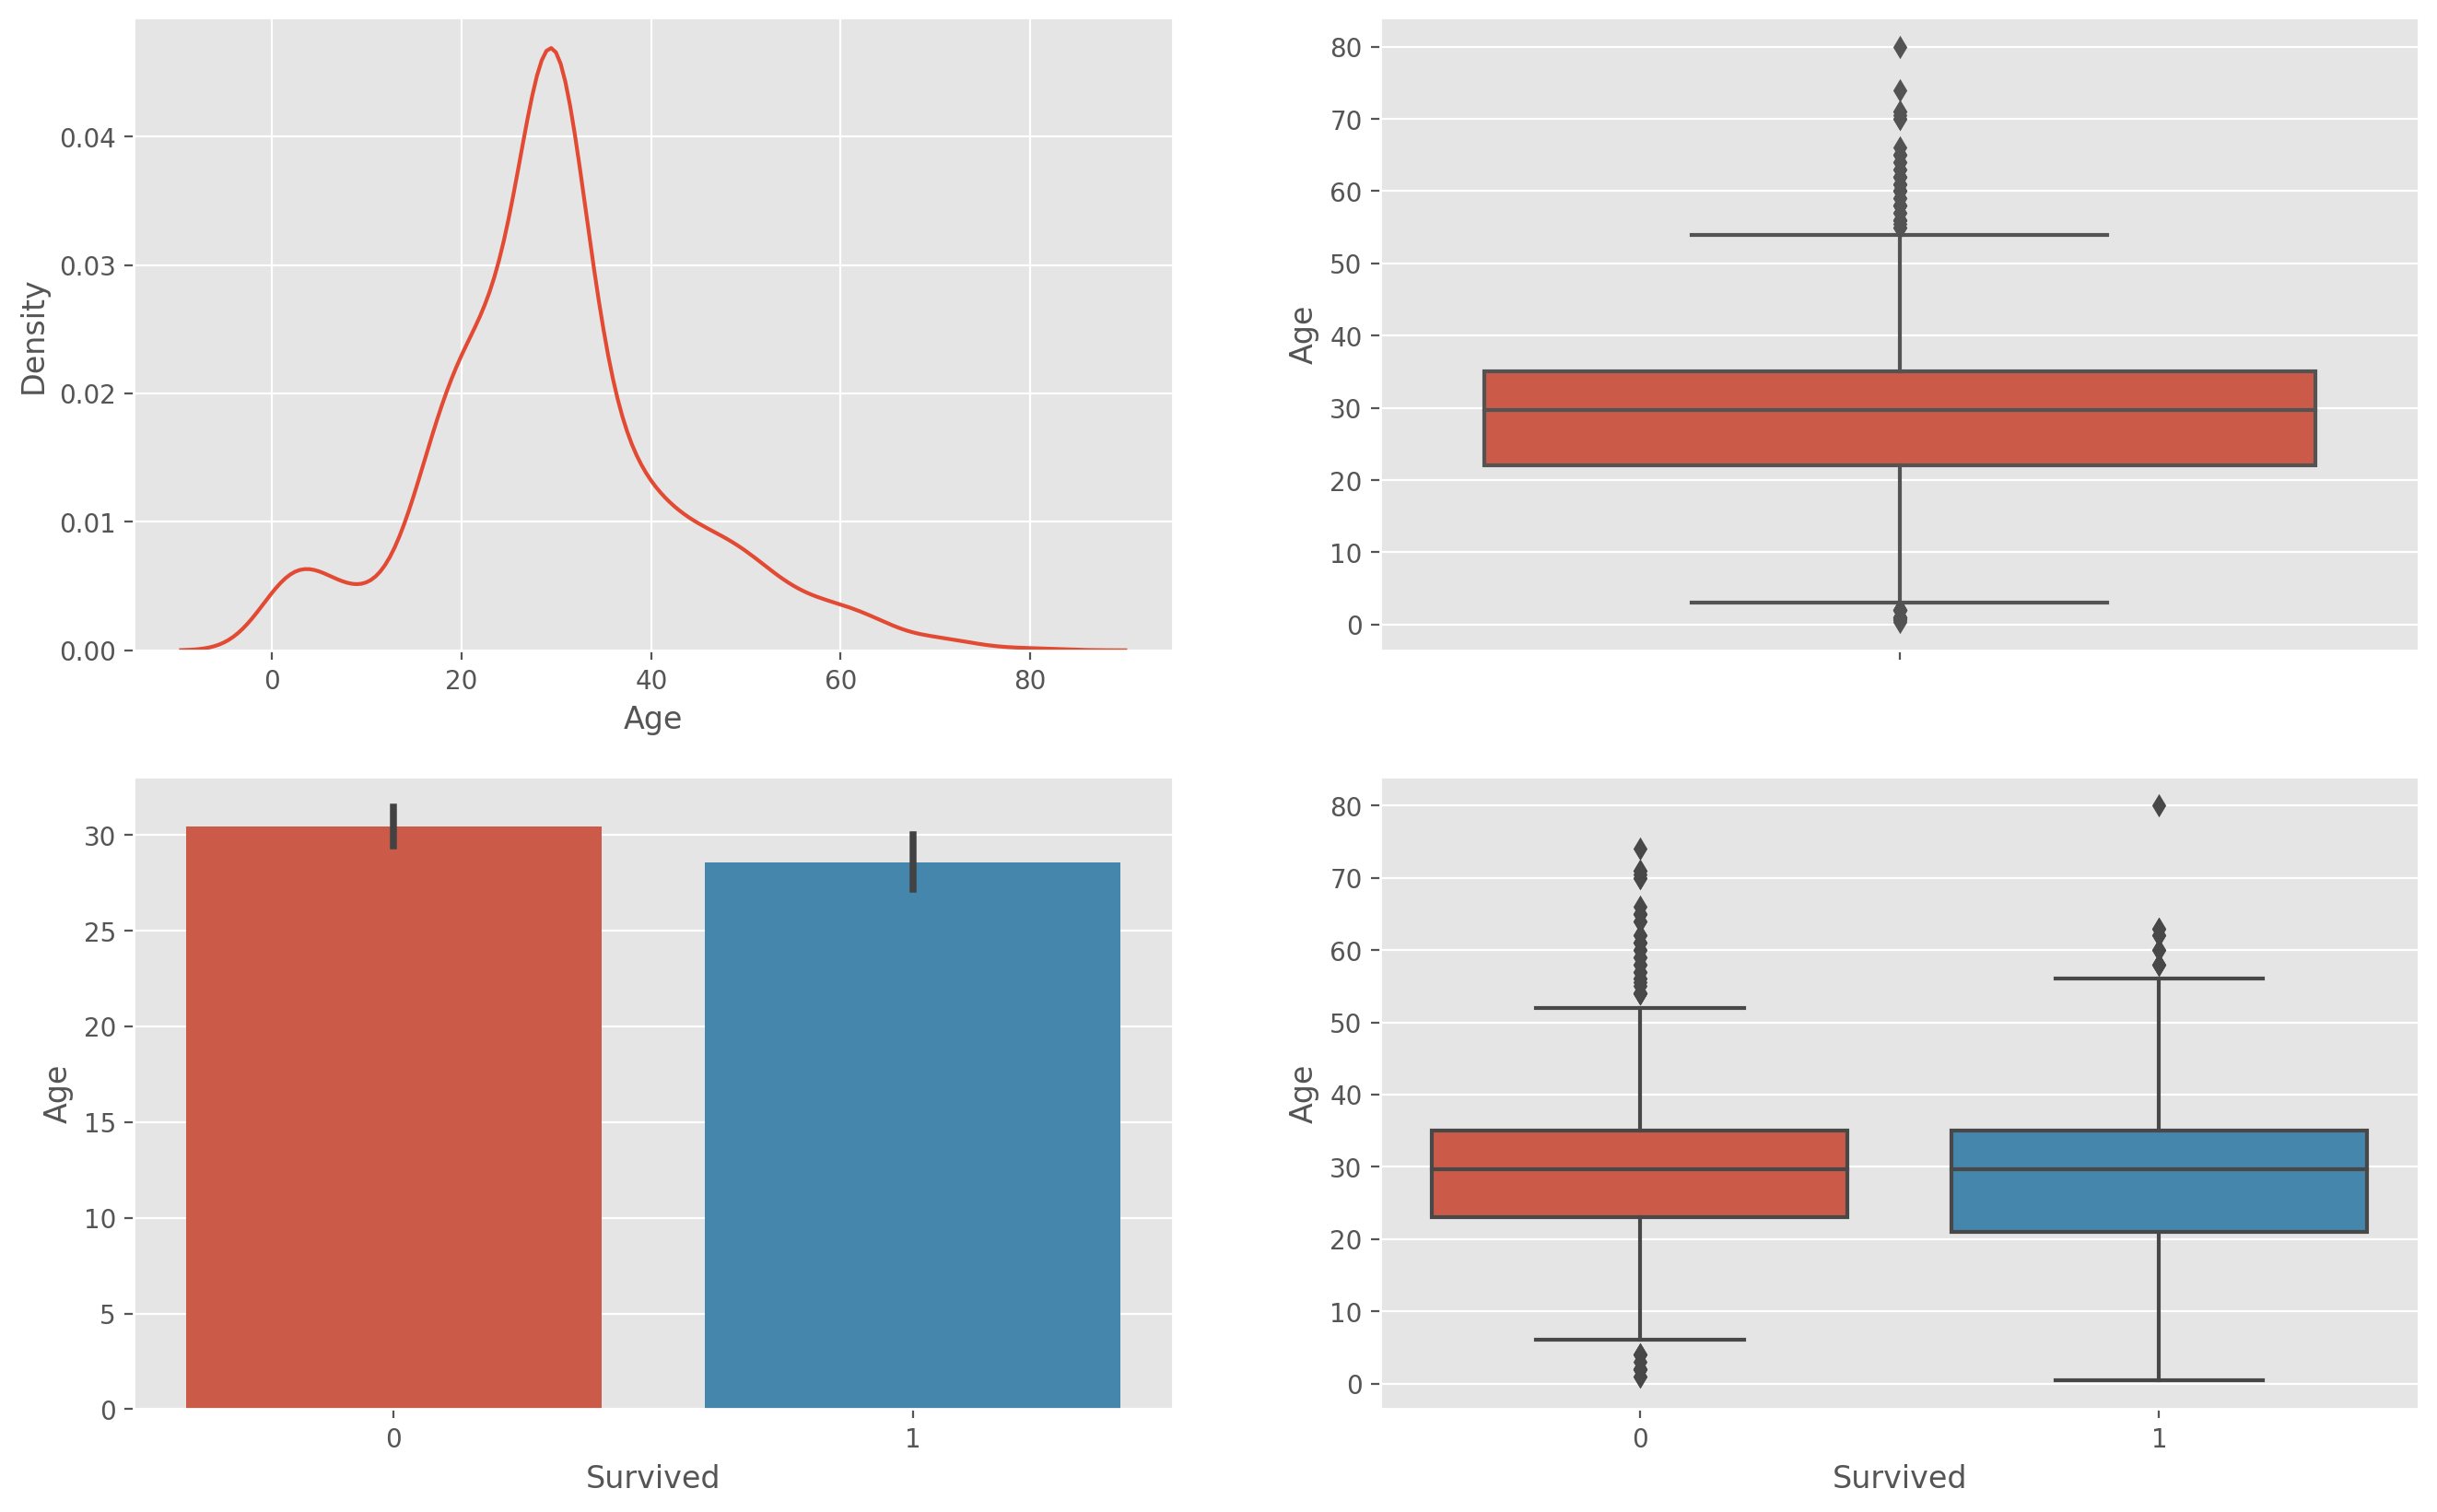

In [25]:
# Age
plt.figure(figsize = (16,10), dpi = 200)
plt.subplot(2,2,1)
sns.distplot(titanic['Age'], hist = False)
plt.subplot(2,2,2)
sns.boxplot(y = titanic['Age'])
plt.subplot(2,2,3)
sns.barplot('Survived', 'Age', data = titanic)
plt.subplot(2,2,4)
sns.boxplot('Survived', 'Age', data = titanic)

---
---

In [32]:
cols = ['Pclass', 'Embarked', 'Sex', 'family_members', 'Age', 'Fare']
X = titanic[cols]
Y = titanic[['Survived']]

In [33]:
X.head()

,Pclass,Embarked,Sex,family_members,Age,Fare
0,3,S,male,1,22.0,7.2500
1,1,C,female,1,38.0,71.2833
2,3,S,female,0,26.0,7.9250
3,1,S,female,1,35.0,53.1000
4,3,S,male,0,35.0,8.0500


In [34]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [35]:
X['Sex'] = X.Sex.map({'male': 0, 'female': 1})
X['Embarked'] = X.Embarked.map({'C':0, 'Q':1,'S':2})
X.head()

,Pclass,Embarked,Sex,family_members,Age,Fare
0,3,2,0,1,22.0,7.2500
1,1,0,1,1,38.0,71.2833
2,3,2,1,0,26.0,7.9250
3,1,2,1,1,35.0,53.1000
4,3,2,0,0,35.0,8.0500


In [36]:
# Binning (Creating Bands)
X.loc[X.Age <= 20, 'Age'] = 0
X.loc[(X.Age > 20) & (X.Age <= 40), 'Age'] = 1
X.loc[X.Age > 40, 'Age'] = 2

X.head(10)

,Pclass,Embarked,Sex,family_members,Age,Fare
0,3,2,0,1,1.0,7.2500
1,1,0,1,1,1.0,71.2833
2,3,2,1,0,1.0,7.9250
3,1,2,1,1,1.0,53.1000
4,3,2,0,0,1.0,8.0500
5,3,1,0,0,1.0,8.4583
6,1,2,0,0,2.0,51.8625
7,3,2,0,4,0.0,21.0750
8,3,2,1,2,1.0,11.1333
9,2,0,1,1,0.0,30.0708


In [37]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (891, 6)
Dependent Feature Shape       :  (891, 1)


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [39]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (668, 6)
Training Labels Shape :  (668, 1)
Testing Data Shape    :  (223, 6)
Testing Labels Shape  :  (223, 1)


---
---

In [50]:
# Training The Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# Evaluate the model
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.8532934131736527
Testing Set Accuracy  :  0.8251121076233184


In [52]:
x_test[:5]

,Pclass,Embarked,Sex,family_members,Age,Fare
126,3,1,0,0,1.0,7.7500
354,3,0,0,0,1.0,7.2250
590,3,2,0,0,1.0,7.1250
509,3,2,0,0,1.0,56.4958
769,3,2,0,0,1.0,8.3625


In [53]:
classifier.predict(x_test[:5])

array([0, 0, 0, 1, 0], dtype=int64)

In [57]:
def predict_survival(x):
    predictions = classifier.predict(x)
    predictions = list(map(lambda i:'Survived' if i == 1 else 'Dead',predictions))
    return predictions

In [58]:
predict_survival(x_test[:5])

['Dead', 'Dead', 'Dead', 'Survived', 'Dead']